<a href="https://colab.research.google.com/github/Juikson/master/blob/main/Lab_02_CNN_Q_ipynb_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network

#### 컨볼루션 맛보기

In [ ]:
import numpy as np

arr1 = np.array([1,0,2,3,2,1,0,1,1,0,1,3,2,0,3,2]).reshape(4,4).astype('float')
arr2 = np.array([1,2,0,3,2,1,0,1,3]).reshape(3,3).astype('float')

In [ ]:
from tensorflow.keras.layers import Conv2D

def custom_kernel(shape, dtype=None):
    kernel = np.array([1,2,0,3,2,1,0,1,3]).astype('float32')
    return kernel.reshape(shape)

conv = Conv2D(1, kernel_size=3, use_bias=False, kernel_initializer=custom_kernel)
conv(arr1.reshape(1, 4, 4, 1))

<tf.Tensor: shape=(1, 2, 2, 1), dtype=float32, numpy=
array([[[[12.],
         [18.]],

        [[17.],
         [15.]]]], dtype=float32)>

##### 특수 필터 사용해보기

In [ ]:
pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=c0d006bc57591dce39487ad8ac61adf40cbb65cedfb0c472ea8461f28507112d
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


 - 이미지 다운로드

In [ ]:
import wget

wget.download('https://raw.githubusercontent.com/WooyeobLee/datarepo/master/tkv.jpg')

'tkv.jpg'

 - 이미지 불러오기

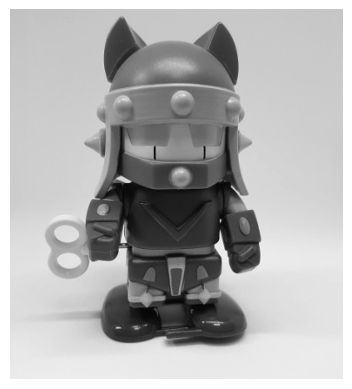

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

image = Image.open('tkv.jpg').convert('L')

plt.figure()
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

- 평균 필터(커널)로 블러링 적용해보기
  - 모든 값이 1/(h*w)로 설정된 필터
  - kernel_size를 변경해보세요.
    - 3~10으로 크기를 올려보세요.

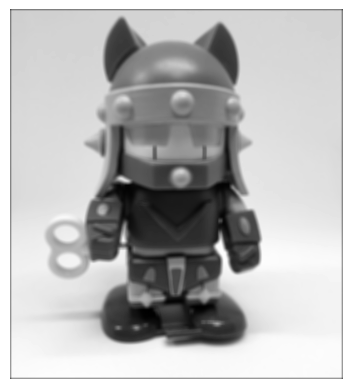

In [ ]:
from tensorflow.keras.layers import Conv2D

def blur_filter(shape, dtype=None):
    kernel = np.ones(shape, dtype='float32')
    kernel /= kernel.size
    return kernel

kernel_size =  5# 커널 크기 지정

image_arr = np.array(image, dtype='float32')

conv = Conv2D(1, kernel_size=kernel_size, use_bias=False, kernel_initializer=blur_filter, padding='same')
image_blur = conv(image_arr.reshape(1, 444, 400, 1))

plt.figure()
plt.imshow(image_blur.numpy().reshape(444, 400, 1), cmap='gray')
plt.axis('off')
plt.show()

 - 미분 필터(커널)로 경계 추출해보기
   - 수직 경계 필터

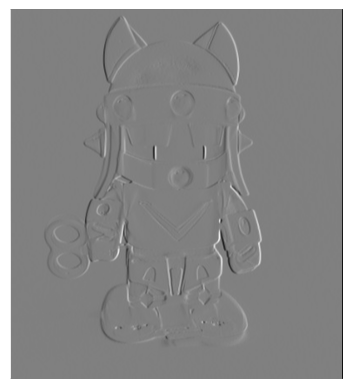

In [ ]:
from tensorflow.keras.layers import Conv2D

def blur_filter(shape, dtype=None):
    kernel = np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype='float32')
    return kernel.reshape(shape)

image_arr = np.array(image, dtype='float32')

conv = Conv2D(1, kernel_size=3, use_bias=False, kernel_initializer=blur_filter, padding='same')
image_edge_vert = conv(image_arr.reshape(1, 444, 400, 1))

plt.figure()
plt.imshow(image_edge_vert.numpy().reshape(444, 400, 1), cmap='gray')
plt.axis('off')
plt.show()

 - 미분 필터(커널)로 경계 추출해보기
   - 수평 경계 필터

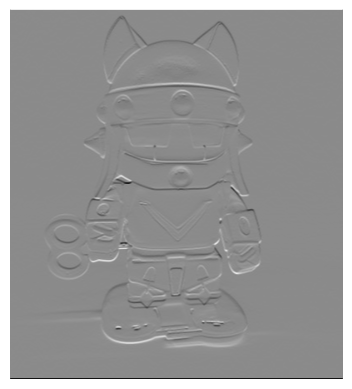

In [ ]:
from tensorflow.keras.layers import Conv2D

def blur_filter(shape, dtype=None):
    kernel = np.array([[-1,-2,-1],[ 0, 0, 0],[ 1, 2, 1]], dtype='float32')
    return kernel.reshape(shape)

image_arr = np.array(image, dtype='float32')

conv = Conv2D(1, kernel_size=3, use_bias=False, kernel_initializer=blur_filter, padding='same')
image_edge_hori = conv(image_arr.reshape(1, 444, 400, 1))

plt.figure()
plt.imshow(image_edge_hori.numpy().reshape(444, 400, 1), cmap='gray')
plt.axis('off')
plt.show()

 - 미분 필터(커널)로 경계 추출해보기
   - 두 방향 경계 합치기

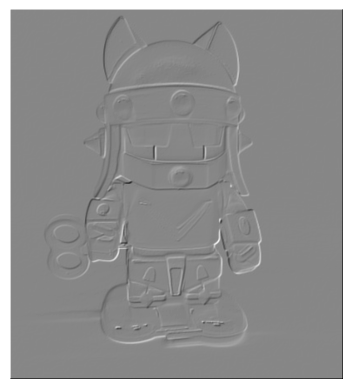

In [ ]:
image_edge = image_edge_vert + image_edge_hori

plt.figure()
plt.imshow(image_edge.numpy().reshape(444, 400, 1), cmap='gray')
plt.axis('off')
plt.show()

#### 풀링 맛보기

 - 이미지 불러오기

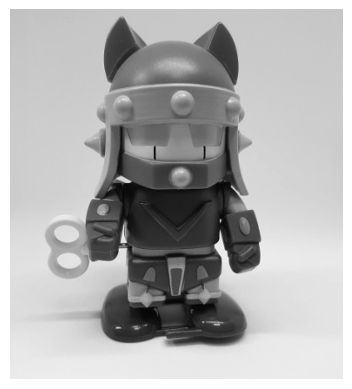

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

image = Image.open('tkv.jpg').convert('L')

plt.figure()
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

 - 평균 풀링 적용해보기

(1, 111, 100, 1)


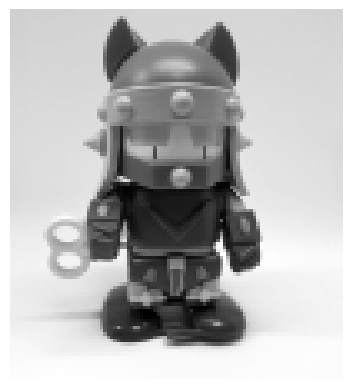

In [ ]:
from tensorflow.keras.layers import AveragePooling2D

image_arr = np.array(image).astype('float32')

pool = AveragePooling2D(4, 4)
aver_pool_image = pool(image_arr.reshape(1, 444, 400, 1))
print(aver_pool_image.shape)

plt.figure()
plt.imshow(aver_pool_image.numpy().squeeze(axis=0), cmap='gray')
plt.axis('off')
plt.show()

 - 최대 풀링 적용해보기
   - pool_size와 strides를 변경해보세요.
     -2~8로 변경해보세요.

(1, 55, 50, 1)


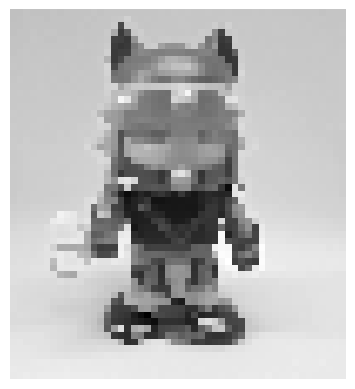

In [ ]:
from tensorflow.keras.layers import MaxPooling2D

image_arr = np.array(image).astype('float32')

pool_size = 8# 풀 윈도우 크기
strides =   8# 이동 간격

pool = MaxPooling2D(pool_size, strides)
aver_pool_image = pool(image_arr.reshape(1, 444, 400, 1))
print(aver_pool_image.shape)

plt.figure()
plt.imshow(aver_pool_image.numpy().squeeze(axis=0), cmap='gray')
plt.axis('off')
plt.show()

#### CNN 모델을 이용하여 Fashion MNIST 데이터 분류 모델링하기 (다항 분류)
 - Fashion MNIST 데이터 불러오기

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train.shape, y_train.shape, x_test.shape, y_test.shape

4422102/4422102 [==============================] - 1s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

 - MNIST 데이터 시각화하기
   - 앞 25개 데이터만 시각화합니다.

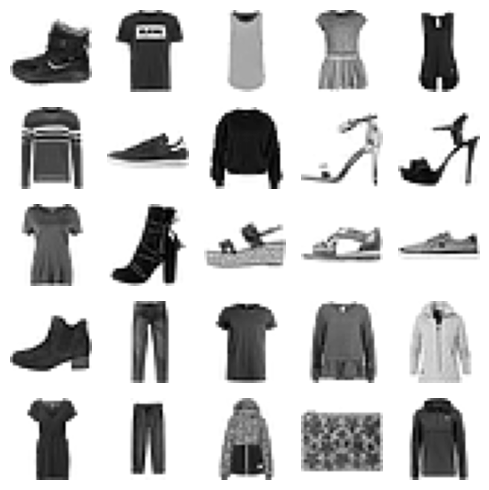

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i], cmap='binary')
    plt.axis('off')

plt.tight_layout()
plt.show()

 - 이미지 데이터에 정규화를 적용해보세요.
   - 이미지 데이터는 0~255 사이 값을 가지므로 255로 나누면 정규화가 됩니다.

In [ ]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

 - 정규화된 이미지 데이터의 shape을 변경해보세요.
   - (batch, height, width, channels) 형태로 변경해야 합니다.

In [ ]:
x_train_scaled = x_train_scaled.reshape(*x_train_scaled.shape,1)
x_test_scaled = x_test_scaled.reshape(*x_test_scaled.shape,1)
x_train_scaled.shape, x_test_scaled.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

- 레이블을 원핫 인코딩합니다.
  - 그대로 실행하세요.

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [ ]:
import numpy as np
import random
import tensorflow as tf

np.random.seed(0)
random.seed(0)
tf.random.set_seed(0)

#####  CNN 모델 구성 방법
  - 필요한 만큼 Conv2d 계층과 Pooling 계층을 조합합니다.
  - DNN(FCN, Fully Connected Layer) 계층을 끝에 추가합니다.
    - Conv+Pooling 계층과 DNN 계층 사이에 Flatten이 필요합니다.

 - Sequential CNN 모델을 구성해보세요.
   - 첫 번째 Conv 계층 설정: 32 필터, 커널 크기 3, relu 활성화, 입력 크기 (28, 28, 1)
   - 두 번째 Conv 계층 설정: 32 필터, 커널 크기 3, relu 활성화
   - 세 번째 풀링 계층 설정: 풀 크기 2
   - 네 번째 Conv 계층 설정: 64 필터, 커널 크기 3, relu 활성화
   - 다섯 번째 Conv 계층 설정: 64 필터, 커널 크기 3, relu 활성화
   - 여섯 번째 풀링 계층 설정: 풀 크기 2
   - 일곱 번째 Flatten 계층 설정
   - 여덟 번째 Dense 계층 설정: 1024 퍼셉트론, relu 활성화
   - 마지막(출력) 계층 설정: 10 퍼셉트론, softmax 활성화
   - 모델 요약을 출력해보세요.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, 3,1,padding='valid', activation='relu', input_shape=[28, 28, 1]))
model.add(Conv2D(32, 3,1,padding='valid', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, 3,1,padding='valid', activation='relu'))
model.add(Conv2D(64, 3,1,padding='valid', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 4, 4, 64)          0         
 g2D)                                                 

 - 손실 함수, 최적화 도구, 측도를 모델에 설정해보세요.
   - 손실 함수: categorical_crossentropy
   - 최적화 도구: adam
   - 측도 함수: accuracy

In [ ]:
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

 - 생성한 모델에 Fashion MNIST 데이터를 학습해보세요.
   - epochs=10, batch_size=64로 설정하세요.
   - validation_data에 평가 데이터를 지정하세요.
   - 결과를 history 변수에 저장하세요.

In [ ]:
history = model.fit(x_train_scaled, y_train, epochs=10, batch_size=64, validation_data=(x_test_scaled, y_test))

Epoch 1/10
938/938 [==============================] - 11s 7ms/step - loss: 0.4705 - accuracy: 0.8262 - val_loss: 0.3335 - val_accuracy: 0.8766
Epoch 2/10
938/938 [==============================] - 5s 6ms/step - loss: 0.2858 - accuracy: 0.8941 - val_loss: 0.2865 - val_accuracy: 0.8928
Epoch 3/10
938/938 [==============================] - 6s 6ms/step - loss: 0.2368 - accuracy: 0.9131 - val_loss: 0.2795 - val_accuracy: 0.9003
Epoch 4/10
938/938 [==============================] - 5s 6ms/step - loss: 0.2024 - accuracy: 0.9255 - val_loss: 0.2320 - val_accuracy: 0.9137
Epoch 5/10
938/938 [==============================] - 5s 6ms/step - loss: 0.1746 - accuracy: 0.9347 - val_loss: 0.2308 - val_accuracy: 0.9174
Epoch 6/10
938/938 [==============================] - 6s 6ms/step - loss: 0.1505 - accuracy: 0.9437 - val_loss: 0.2352 - val_accuracy: 0.9154
Epoch 7/10
938/938 [==============================] - 5s 6ms/step - loss: 0.1299 - accuracy: 0.9514 - val_loss: 0.2498 - val_accuracy: 0.9188
Epoch

- 저장한 학습 진행 과정을 시각화하세요.

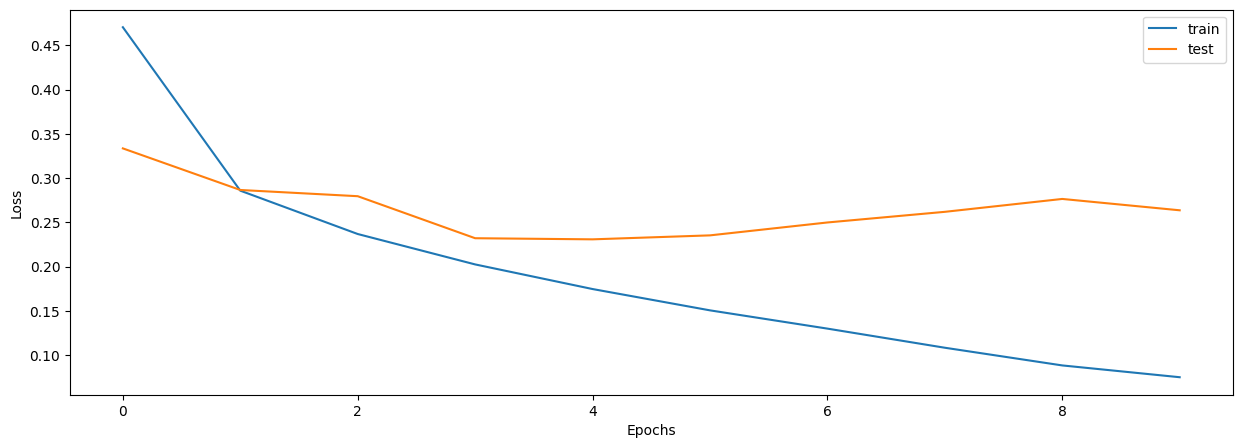

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

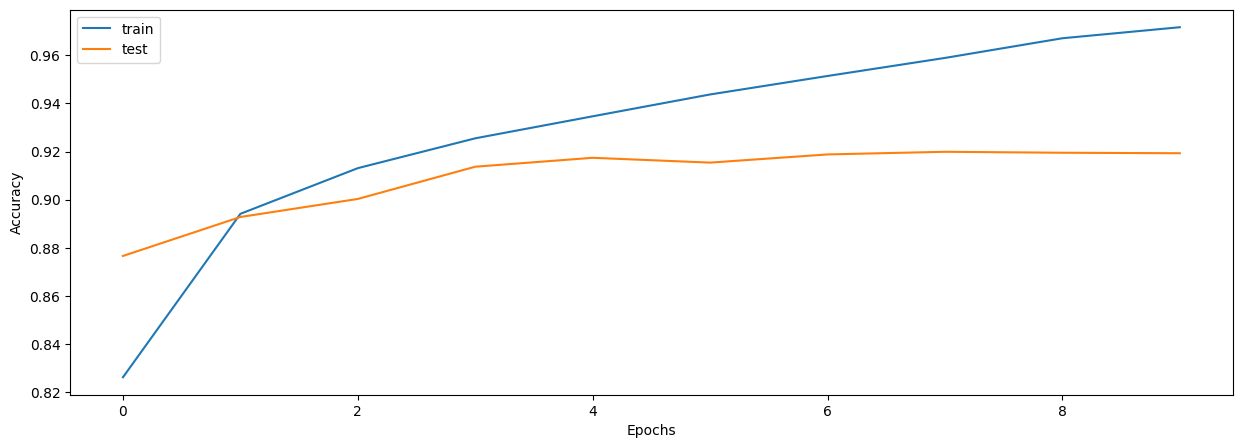

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

 - 학습/평가 데이터에 대해 측도 값을 출력해보세요.

In [ ]:
train_result = model.evaluate(x_train_scaled, y_train)
test_result = model.evaluate(x_test_scaled, y_test)

print(f'학습 데이터 결과: {train_result}')
print(f'평가 데이터 결과: {test_result}')

313/313 [==============================] - 1s 3ms/step - loss: 0.2636 - accuracy: 0.9193
학습 데이터 결과: [0.056740496307611465, 0.9812833070755005]
평가 데이터 결과: [0.2635866105556488, 0.9193000197410583]


 - 평가 데이터에 대해 예측 확률 값을 생성해보세요.

In [ ]:
pred_prob = model.predict(x_test_scaled)
pred_prob = np.argmax(pred_prob, axis=1)
pred_prob

313/313 [==============================] - 1s 2ms/step


array([9, 2, 1, ..., 8, 1, 5])

 - 예측 확률을 예측 클래스 값으로 가공하기

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

##### 디스크에 저장된 이미지 데이터로 학습하기
 - dogs and cats 데이터 다운로드

In [ ]:
pip install mySUNI

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 59.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 14.6 MB/s eta 0:00:00


In [ ]:
from mySUNI import cds

cds.download_data('dogscats.zip')

파일 다운로드 완료

데이터셋: dogscats.zip
파일경로: data/dogscats.zip



 - 압축된 zip 파일 해제하기

In [ ]:
import zipfile

with zipfile.ZipFile('./data/dogscats.zip') as zf:
    zf.extractall('./data/dogscats')

 - 이미지 파일 한 개 불러오기

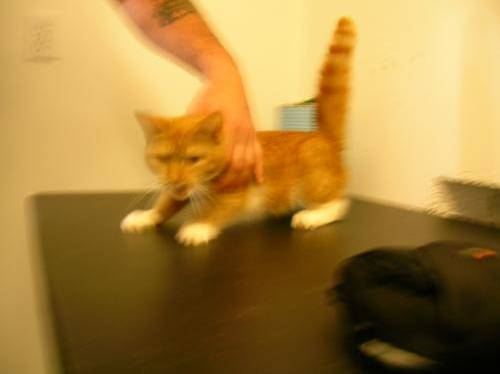

In [ ]:


image =
image

 - PIL 이미지를 배열로 변환하기
   1. np.array 사용
   2. img_to_array 사용

In [ ]:
from tensorflow.keras.preprocessing.image import load_img

image = load_img('./data/dogscats/train/cats/cat.0.jpg')
image_arr1 =
image_arr2 =
image_arr1, image_arr2

(array([[[203, 164,  87],
         [203, 164,  87],
         [204, 165,  88],
         ...,
         [240, 201, 122],
         [239, 200, 121],
         [238, 199, 120]],
 
        [[203, 164,  87],
         [203, 164,  87],
         [204, 165,  88],
         ...,
         [241, 202, 123],
         [240, 201, 122],
         [238, 199, 120]],
 
        [[203, 164,  87],
         [203, 164,  87],
         [204, 165,  88],
         ...,
         [241, 202, 123],
         [240, 201, 122],
         [239, 200, 121]],
 
        ...,
 
        [[153, 122,  55],
         [153, 122,  55],
         [153, 122,  55],
         ...,
         [  2,   2,   0],
         [  2,   2,   0],
         [  2,   2,   0]],
 
        [[152, 121,  54],
         [152, 121,  54],
         [152, 121,  54],
         ...,
         [  2,   2,   0],
         [  2,   2,   0],
         [  2,   2,   0]],
 
        [[151, 120,  53],
         [151, 120,  53],
         [151, 120,  53],
         ...,
         [  1,   1,   0],
  

In [ ]:
import numpy as np
import random
import tensorflow as tf

np.random.seed(0)
random.seed(0)
tf.random.set_seed(0)

 - 폴더(디렉토리)에서 이미지를 읽어보세요.
   - 한 번에 batch_size(미니 배치 크기) 크기 만큼 읽어옵니다.
     - 32로 지정하세요.
   - image_size를 지정하여 이미지를 resize 할 수 있습니다.
     - (150, 150)으로 지정하세요.
   - shuffle=True, seed=0을 설정하세요.
     - valid_ds는 shuffle=False, seed=None으로 설정하세요.
   - ./data/dogscats/train의 데이터를 train_ds에 불러오세요.
   - ./data/dogscats/validation의 데이터를 valid_ds에 불러오세요.

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
train_ds = image_dataset_from_directory(
    './data/dogscats/train/',
    batch_size=32,
    image_size=(150,150),
    shuffle=True,
    seed=0,
    validation_split=0.2,
    subset = 'training'
)
train_ds

Found 2000 files belonging to 2 classes.
Using 1600 files for training.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
valid_ds = image_dataset_from_directory(
    './data/dogscats/validation/',
    batch_size=32,
    image_size=(150,150),
    shuffle=False,
)
valid_ds

Found 1000 files belonging to 2 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

 - train_ds에서 이미지 데이터 읽어보기
   - next(iter(ds))로 batch_size 수의 이미지를 읽을 수 있습니다.
   - 앞 4개 이미지만 시각화해보세요.

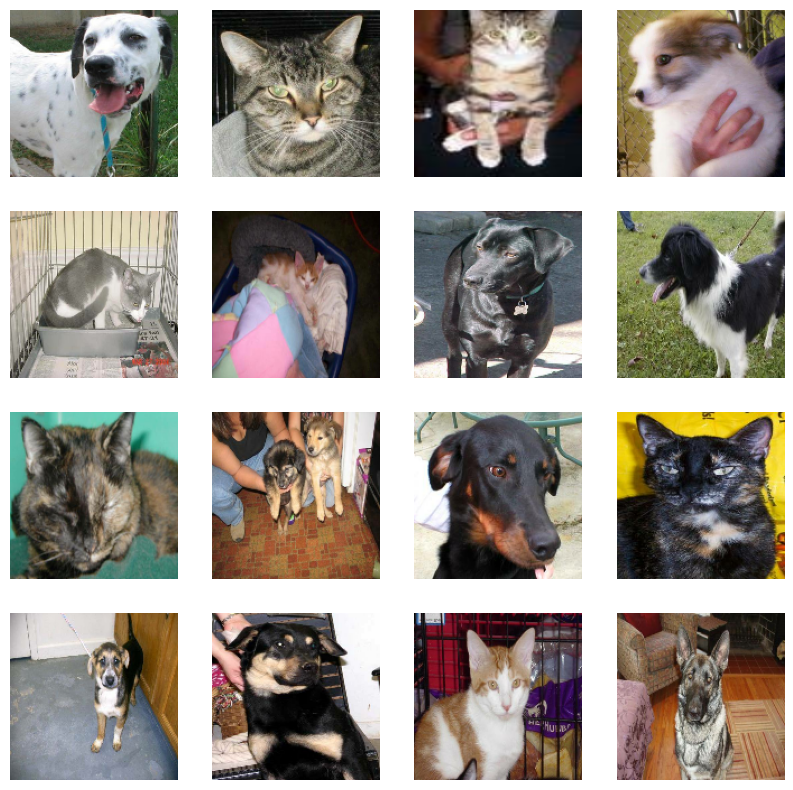

In [ ]:
import matplotlib.pyplot as plt

x, y = next(iter(train_ds))

plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(x.numpy()[i].astype('uint8'))
    plt.axis('off')
plt.show()

 - Sequential CNN 모델을 구성해보세요.
   - 첫 번째 Conv 계층 설정: 32 필터, 커널 크기 3, relu 활성화, 입력 크기 (150, 150, 3)
   - 두 번째 풀링 계층 설정: 풀 크기 2
   - 세 번째 Conv 계층 설정: 64 필터, 커널 크기 3, relu 활성화
   - 네 번째 풀링 계층 설정: 풀 크기 2
   - 다섯 번째 Conv 계층 설정: 128 필터, 커널 크기 3, relu 활성화
   - 여섯 번째 풀링 계층 설정: 풀 크기 2
   - 일곱 번째 Conv 계층 설정: 128 필터, 커널 크기 3, relu 활성화
   - 여덟 번째 풀링 계층 설정: 풀 크기 2
   - 아홉 번째 Flatten 계층 설정
   - 열 번째 Dense 계층 설정: 512 퍼셉트론, relu 활성화
   - 마지막(출력) 계층 설정: 1 퍼셉트론, sigmoid 활성화
   - 모델 요약을 출력해보세요.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, 3, activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, 3, activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, 3, activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 17, 17, 128)      

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 17, 17, 128)      

 - 손실 함수, 최적화 도구, 측도를 모델에 설정해보세요.
   - 손실 함수: binary_crossentropy
   - 최적화 도구: adam
   - 측도 함수: accuracy

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

 - 생성한 모델에 Dogs and Cats 데이터를 학습해보세요.
   - x, y 대신 train_ds를 입력하세요.
   - epochs=100으로 설정하세요.
   - validation_data에 valid_ds를 입력하세요.
   - 결과를 history 변수에 저장하세요.

In [ ]:
history = model.fit(train_ds,
                    epochs=10,
                    validation_data=valid_ds)

Epoch 1/10
50/50 [==============================] - 8s 76ms/step - loss: 5.5722 - accuracy: 0.5375 - val_loss: 0.6936 - val_accuracy: 0.4850
Epoch 2/10
50/50 [==============================] - 3s 49ms/step - loss: 0.6936 - accuracy: 0.5169 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 3/10
50/50 [==============================] - 3s 49ms/step - loss: 0.6930 - accuracy: 0.5256 - val_loss: 0.6986 - val_accuracy: 0.4840
Epoch 4/10
50/50 [==============================] - 3s 65ms/step - loss: 0.6875 - accuracy: 0.5444 - val_loss: 0.6945 - val_accuracy: 0.4890
Epoch 5/10
50/50 [==============================] - 3s 54ms/step - loss: 0.6864 - accuracy: 0.5425 - val_loss: 0.6953 - val_accuracy: 0.5270
Epoch 6/10
50/50 [==============================] - 3s 51ms/step - loss: 0.6629 - accuracy: 0.5719 - val_loss: 0.7335 - val_accuracy: 0.5310
Epoch 7/10
50/50 [==============================] - 3s 50ms/step - loss: 0.6379 - accuracy: 0.6237 - val_loss: 0.7446 - val_accuracy: 0.5490
Epoch 8/10
50

- 저장한 학습 진행 과정을 시각화하세요.

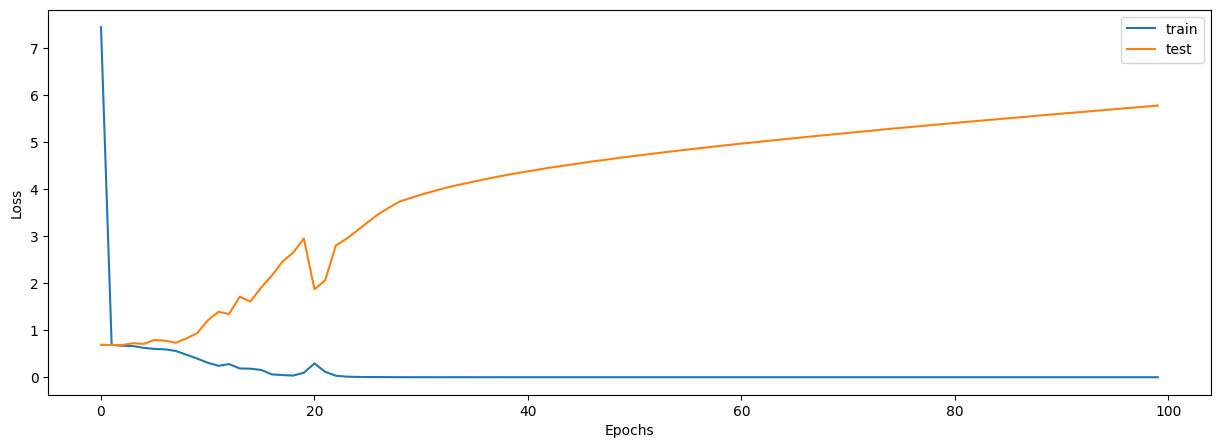

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

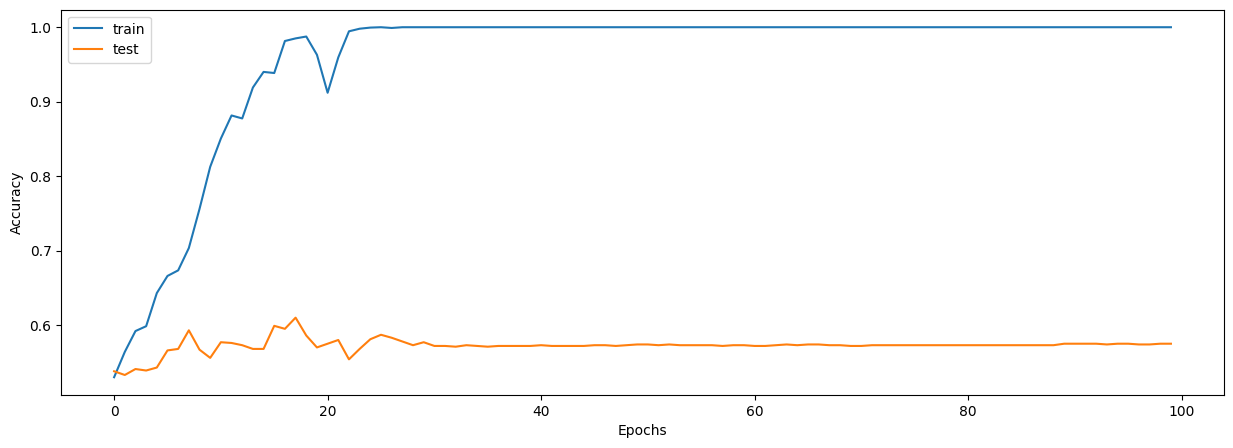

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

 - 학습/평가 데이터에 대해 측도 값을 출력해보세요.

In [ ]:
train_result = model.evaluate(train_ds)
test_result = model.evaluate(valid_ds)

print(f'학습 데이터 결과: {train_result}')
print(f'평가 데이터 결과: {test_result}')

32/32 [==============================] - 2s 53ms/step - loss: 0.8835 - accuracy: 0.5680
학습 데이터 결과: [0.4656231701374054, 0.7593749761581421]
평가 데이터 결과: [0.8834581971168518, 0.5680000185966492]


 - 평가 데이터에 대해 예측 확률 값을 생성해보세요.

In [ ]:
pred_prob =
pred_prob

SyntaxError: invalid syntax (<ipython-input-44-ef6f2520985f>, line 1)

 - 예측 확률을 예측 클래스 값으로 가공하기

array([[0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
    

##### 이미지 데이터 증강하기
  - ImageDataGenerator 사용법
    1. 증강에 적용할 변환 방법이 설정된 증강 생성기(Generator) 생성
    2. 생성한 증강 생성기를 이미지 데이터가 있는 폴더와 연결
      - flow_from_directory
      - 이미지 크기, 배치 크기, 클래스 모드 설정

 - ImageDataGenerator를 이용하여 Dogs and Cats 데이터를 증강해보세요.
 - 학습 데이터용 증강 생성기는 다음과 같이 설정해보세요.
   - rescale=1./255
   - rotation_range=40
   - width_shift_range=0.2
   - height_shift_range=0.2
   - shear_range=0.2
   - zoom_range=0.2
   - horizontal_flip=True # 여기까지 생성기
   - image_size=(150,150) # 여기부터 flow_from_directory
   - batch_size=32
   - class_mode='binary'
   - shuffle=True
   - seed=0
 - 평가 데이터용 증강 생성기는 다음과 같이 설정해보세요.
   - rescale=1./255 # 여기까지 생성기
   - image_size=(150,150) # 여기부터
   - batch_size=32
   - class_mode='binary'
   - shuffle=False

In [ ]:
import numpy as np
import random
import tensorflow as tf

np.random.seed(0)
random.seed(0)
tf.random.set_seed(0)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


train_ds = train_gen.flow_from_directory(
    './data/dogscats/train/',  # 학습 데이터 폴더 경로
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=True,
    seed=0
)

valid_gen = ImageDataGenerator(
    rescale=1./255,)

valid_ds = valid_gen.flow_from_directory(
    './data/dogscats/train/',  # 학습 데이터 폴더 경로
    target_size=(150, 150),
    batch_size=32,
)

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


 - 증강 이미지 출력해보기

In [ ]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

image = load_img('./data/dogscats/train/cats/cat.325.jpg')
image_arr = img_to_array(image)
image_arr = image_arr.reshape(-1, *(image_arr.shape))

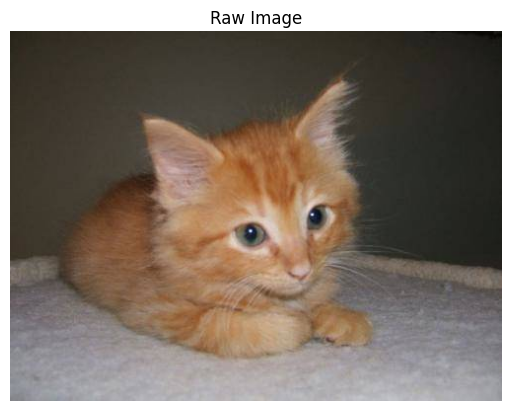

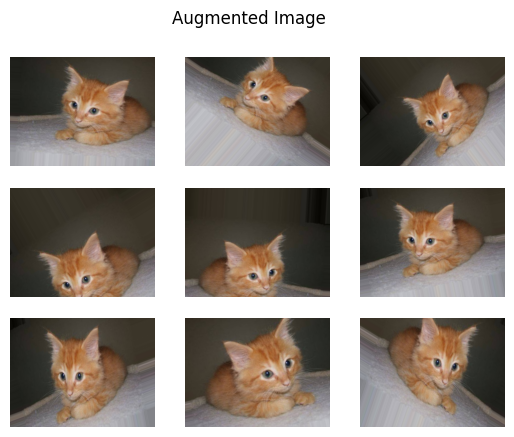

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(image_arr.squeeze(axis=0).astype('uint8'))
plt.axis('off')
plt.title('Raw Image')
plt.show()
plt.figure()
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(next(train_gen.flow(image_arr, batch_size=1)).squeeze(axis=0))
    plt.axis('off')
plt.suptitle('Augmented Image')
plt.show()

##### 증강한 이미지로 재학습해보세요.
 - Sequential CNN 모델을 구성해보세요.
   - 첫 번째 Conv 계층 설정: 32 필터, 커널 크기 3, relu 활성화, 입력 크기 (150, 150, 3)
   - 두 번째 풀링 계층 설정: 풀 크기 2
   - 세 번째 Conv 계층 설정: 64 필터, 커널 크기 3, relu 활성화
   - 네 번째 풀링 계층 설정: 풀 크기 2
   - 다섯 번째 Conv 계층 설정: 128 필터, 커널 크기 3, relu 활성화
   - 여섯 번째 풀링 계층 설정: 풀 크기 2
   - 일곱 번째 Conv 계층 설정: 128 필터, 커널 크기 3, relu 활성화
   - 여덟 번째 풀링 계층 설정: 풀 크기 2
   - 아홉 번째 Flatten 계층 설정
   - 열 번째 Dense 계층 설정: 512 퍼셉트론, relu 활성화
   - 마지막(출력) 계층 설정: 1 퍼셉트론, sigmoid 활성화
   - 모델 요약을 출력해보세요.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu',
                 input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 17, 17, 128)      

 - 손실 함수, 최적화 도구, 측도를 모델에 설정해보세요.
   - 손실 함수: binary_crossentropy
   - 최적화 도구: adam
   - 측도 함수: accuracy

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

 - 생성한 모델에 Dogs and Cats 데이터를 학습해보세요.
   - x, y 대신 train_ds를 입력하세요.
   - epochs=100으로 설정하세요.
   - validation_data에 valid_ds를 입력하세요.
   - 결과를 history 변수에 저장하세요.

In [ ]:
# T4 기준 약 30분 소요
history = model.fit(train_ds,
                    epochs=20,
                    validation_data=valid_ds)

Epoch 1/20
63/63 [==============================] - 19s 260ms/step - loss: 0.7027 - accuracy: 0.5255 - val_loss: 0.6942 - val_accuracy: 0.5000
Epoch 2/20
63/63 [==============================] - 19s 296ms/step - loss: 0.6849 - accuracy: 0.5560 - val_loss: 0.7010 - val_accuracy: 0.5000
Epoch 3/20
63/63 [==============================] - 16s 258ms/step - loss: 0.6676 - accuracy: 0.5860 - val_loss: 0.8722 - val_accuracy: 0.5000
Epoch 4/20
63/63 [==============================] - 16s 259ms/step - loss: 0.6552 - accuracy: 0.6195 - val_loss: 0.8184 - val_accuracy: 0.5000
Epoch 5/20
63/63 [==============================] - 17s 263ms/step - loss: 0.6726 - accuracy: 0.5905 - val_loss: 0.7111 - val_accuracy: 0.5000
Epoch 6/20
63/63 [==============================] - 17s 267ms/step - loss: 0.6651 - accuracy: 0.6025 - val_loss: 0.7541 - val_accuracy: 0.5000
Epoch 7/20
63/63 [==============================] - 16s 258ms/step - loss: 0.6408 - accuracy: 0.6345 - val_loss: 0.8155 - val_accuracy: 0.5000

- 저장한 학습 진행 과정을 시각화하세요.

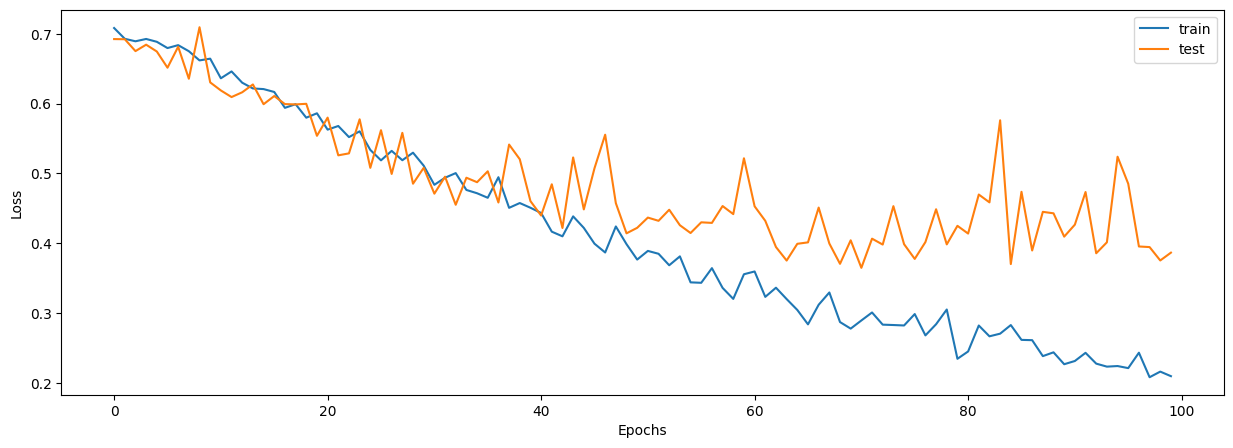

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

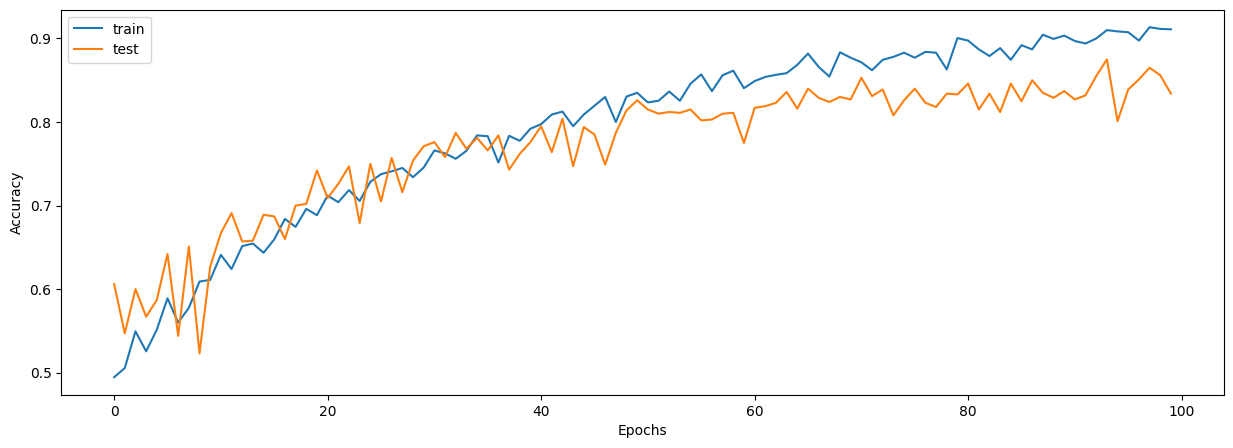

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

 - 학습/평가 데이터에 대해 측도 값을 출력해보세요.

In [ ]:
train_result = model.evaluate(train_ds)
test_result = model.evaluate(valid_ds)

print(f'학습 데이터 결과: {train_result}')
print(f'평가 데이터 결과: {test_result}')

32/32 [==============================] - 2s 51ms/step - loss: 0.3867 - accuracy: 0.8340
학습 데이터 결과: [0.19023944437503815, 0.9259999990463257]
평가 데이터 결과: [0.38666442036628723, 0.8339999914169312]


 - 평가 데이터에 대해 예측 확률 값을 생성해보세요.

In [ ]:
pred_prob = model.predict(valid_ds)
pred_prob

32/32 [==============================] - 2s 53ms/step


array([[4.68909860e-01],
       [9.61699009e-01],
       [9.24230993e-01],
       [6.18269555e-02],
       [9.73705668e-04],
       [9.99839187e-01],
       [1.80990204e-01],
       [9.55283582e-01],
       [6.73379183e-01],
       [9.99999523e-01],
       [9.02802587e-01],
       [9.08532143e-01],
       [1.92959812e-02],
       [9.76463675e-01],
       [2.39417260e-03],
       [9.99035001e-01],
       [9.62864041e-01],
       [9.19475481e-02],
       [5.75508535e-01],
       [9.80391920e-01],
       [2.30245944e-02],
       [1.55623168e-01],
       [9.57452002e-08],
       [9.92992759e-01],
       [9.99825776e-01],
       [9.99478400e-01],
       [6.98263824e-01],
       [1.54701769e-02],
       [3.65025163e-01],
       [1.26224933e-02],
       [6.78680599e-01],
       [1.00000000e+00],
       [9.98879015e-01],
       [9.83932167e-02],
       [3.11270747e-02],
       [8.87130620e-04],
       [9.90514278e-01],
       [9.64015126e-01],
       [1.15023948e-01],
       [9.99998331e-01],


 - 예측 확률을 예측 클래스 값으로 가공하기

In [ ]:
(pred_prob > .5).astype('int')

array([[0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
    

#### 사전 학습 모델 사용해보기
  - 사전 학습 모델 사용법
    1. 사전 학습 모델 불러오기
       - 분류기(top) 포함 여부 결정
       - 입력 shape 설정
    2. 추가 학습 or 추론하기

##### 사전 학습된 VGG16으로 Dogs and Cats 분류해보기
  - 사전 학습된 VGG16 모델을 생성해보세요.
    - weigths='imagenet'
    - include_top=True,
    - input_shape=(224, 224, 3)
  - 모델의 요약을 출력해보세요.

In [ ]:
base_model =


553467096/553467096 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

 - 이미지 데이터 생성기를 새로 생성합니다.
   - 추론을 위해서 test_gen을 생성합니다.
   - 이미지 크기를 224, 224로 변경합니다.


In [ ]:
import numpy as np

test_gen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
test_gen.mean = np.array([0.485, 0.456, 0.406], dtype='float32').reshape(1,1,3) * 255
test_gen.std = np.array([0.229, 0.224, 0.225], dtype='float32').reshape(1,1,3) * 255

test_ds = test_gen.flow_from_directory(
    './data/dogscats/validation',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False)

Found 1000 images belonging to 2 classes.


In [ ]:
base_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
base_model.evaluate(test_ds)

32/32 [==============================] - 5s 139ms/step - loss: 8.6123 - accuracy: 0.0000e+00


[8.612268447875977, 0.0]

##### 전이학습 해보기
  - 사전 학습된 모델의 분류기(top)을 버리고 새 분류기를 추가한 후 학습시켜보세요.
  - 전이 학습 방법
    1. Top을 제외한 사전 학습 모델을 불러옵니다.
    2. 사전 학습 모델을 포함한 Sequential 모델을 구성합니다.
    3. 사전 학습 모델의 가중치를 동결합니다.
      - 사전 학습 모델의 가중치는 학습시키지 않고 사용만 합니다.

 - VGG16을 이용하여 전이 학습 모델을 구성해보세요.
   - 첫 번째 사전 학습 계층
     - VGG16
     - weights='imagenet'
     - include_top=False
     - input_shape=(150, 150, 3)
   - 두 번째 Flatten 계층
   - 세 번째 Dense 계층: 1024 퍼셉트론, relu 활성화
   - 세 번째 Dense 계층: 512 퍼셉트론, relu 활성화
   - 마지막 출력 계층: 1 퍼셉트론, sigmoid 활성화
- 모델 요약을 출력해보세요.

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

base_model =
model = Sequential()



model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_5 (Dense)             (None, 1024)              8389632   
                                                                 
 dense_6 (Dense)             (None, 512)               524800    
                                                                 
 dense_7 (Dense)             (None, 1)                 513       
                                                                 
Total params: 23629633 (90.14 MB)
Trainable params: 23629633 (90.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


 - 사전 학습 모델의 가중치를 동결해보세요.
   - 모델의 요약을 다시 출력해보세요.

In [ ]:
print(f'동결 전 학습 가능 가중치+편향 블럭 수: {len(model.trainable_weights)}')
# 동결 코드

print(f'동결 후 학습 가능 가중치+편향 블럭 수: {len(model.trainable_weights)}')
model.summary()

동결 전 학습 가능 가중치+편향 블럭 수: 32
동결 후 학습 가능 가중치+편향 블럭 수: 6
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_5 (Dense)             (None, 1024)              8389632   
                                                                 
 dense_6 (Dense)             (None, 512)               524800    
                                                                 
 dense_7 (Dense)             (None, 1)                 513       
                                                                 
Total params: 23629633 (90.14 MB)
Trainable params: 8914945 (34.01 MB)
Non-trainable params: 14714688 (56.13 MB)
____________________

 - 손실 함수, 최적화 도구, 측도를 모델에 설정해보세요.
   - 손실 함수: binary_crossentropy
   - 최적화 도구: adam
   - 측도 함수: accuracy

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

 - 생성한 모델에 Dogs and Cats 데이터를 학습해보세요.
   - x, y 대신 train_ds를 입력하세요.
   - epochs=30으로 설정하세요.
   - validation_data에 valid_ds를 입력하세요.
   - 결과를 history 변수에 저장하세요.

In [ ]:
# T4 기준 약 10분 소요
history =

Epoch 1/30
63/63 [==============================] - 20s 298ms/step - loss: 0.7675 - accuracy: 0.6800 - val_loss: 0.3204 - val_accuracy: 0.8600
Epoch 2/30
63/63 [==============================] - 24s 378ms/step - loss: 0.3891 - accuracy: 0.8185 - val_loss: 0.2844 - val_accuracy: 0.8780
Epoch 3/30
63/63 [==============================] - 18s 286ms/step - loss: 0.3628 - accuracy: 0.8370 - val_loss: 0.2660 - val_accuracy: 0.8960
Epoch 4/30
63/63 [==============================] - 21s 333ms/step - loss: 0.3443 - accuracy: 0.8490 - val_loss: 0.2874 - val_accuracy: 0.8820
Epoch 5/30
63/63 [==============================] - 18s 286ms/step - loss: 0.3338 - accuracy: 0.8410 - val_loss: 0.2546 - val_accuracy: 0.8900
Epoch 6/30
63/63 [==============================] - 19s 296ms/step - loss: 0.3169 - accuracy: 0.8605 - val_loss: 0.2427 - val_accuracy: 0.8990
Epoch 7/30
63/63 [==============================] - 18s 290ms/step - loss: 0.3172 - accuracy: 0.8575 - val_loss: 0.2349 - val_accuracy: 0.9030

- 저장한 학습 진행 과정을 시각화하세요.

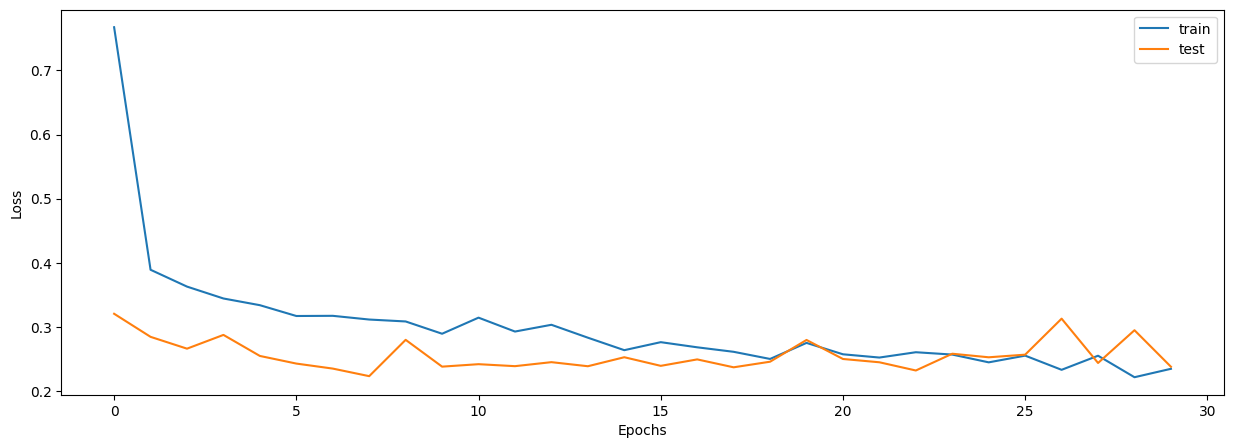

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

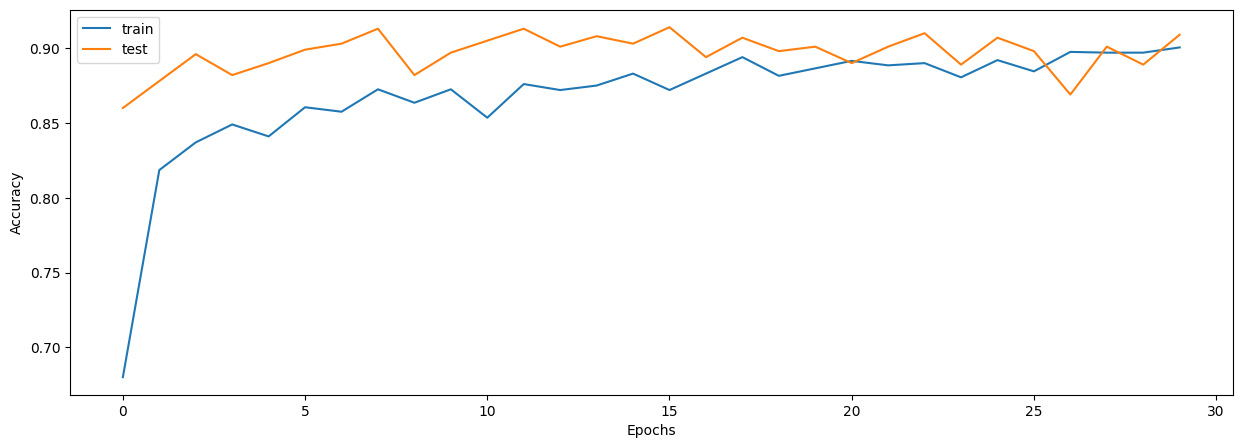

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

 - 학습/평가 데이터에 대해 측도 값을 출력해보세요.

In [ ]:
train_result = model.evaluate(train_ds)
test_result = model.evaluate(valid_ds)

print(f'학습 데이터 결과: {train_result}')
print(f'평가 데이터 결과: {test_result}')

32/32 [==============================] - 2s 69ms/step - loss: 0.2378 - accuracy: 0.9090
학습 데이터 결과: [0.21394792199134827, 0.9139999747276306]
평가 데이터 결과: [0.23777367174625397, 0.9089999794960022]


 - 평가 데이터에 대해 예측 확률 값을 생성해보세요.

In [ ]:
pred_prob = model.predict(valid_ds)
pred_prob

32/32 [==============================] - 2s 69ms/step


array([[9.99894500e-01],
       [8.45584145e-04],
       [1.41283229e-01],
       [1.68375876e-02],
       [3.37118618e-02],
       [2.87373960e-01],
       [3.73780370e-01],
       [9.99996424e-01],
       [9.99759495e-01],
       [9.96849239e-01],
       [1.00000000e+00],
       [6.79822862e-01],
       [9.98555243e-01],
       [1.12284549e-01],
       [3.68365981e-02],
       [1.70600995e-01],
       [9.99785006e-01],
       [9.99990344e-01],
       [9.99621511e-01],
       [3.02377273e-03],
       [1.18942349e-04],
       [4.57102172e-02],
       [2.93748908e-05],
       [9.99976993e-01],
       [4.07061577e-01],
       [5.47730504e-03],
       [9.99678254e-01],
       [9.97648299e-01],
       [7.86497351e-03],
       [1.23121003e-02],
       [1.15214303e-01],
       [9.98436511e-01],
       [9.99855042e-01],
       [6.02612734e-01],
       [3.58419001e-01],
       [3.67539227e-01],
       [9.99966145e-01],
       [1.88255720e-02],
       [6.83922321e-02],
       [7.32365608e-01],


 - 예측 확률을 예측 클래스 값으로 가공하기

In [ ]:
(pred_prob > .5).astype('int')

array([[1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
    

##### 미세 조정 해보기
  - 미세 조정 방법
    1. Top을 제외한 사전 학습 모델을 불러옵니다.
    2. 사전 학습 모델을 포함한 Sequential 모델을 구성합니다.
    3. 사전 학습 모델의 가중치 중 일부를 제외한 나머지를 동결합니다.
    5. 작은 스텝으로 학습시킵니다.

 - VGG16을 이용하여 미세 조정 모델을 구성해보세요.
   - 첫 번째 사전 학습 계층
     - VGG16
     - weights='imagenet'
     - include_top=False
     - input_shape=(150, 150, 3)
   - 두 번째 Flatten 계층
   - 세 번째 Dense 계층: 1024 퍼셉트론, relu 활성화
   - 세 번째 Dense 계층: 512 퍼셉트론, relu 활성화
   - 마지막 출력 계층: 1 퍼셉트론, sigmoid 활성화
- 모델 요약을 출력해보세요.

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 8192)              0         
                                                                 
 dense_11 (Dense)            (None, 1024)              8389632   
                                                                 
 dense_12 (Dense)            (None, 512)               524800    
                                                                 
 dense_13 (Dense)            (None, 1)                 513       
                                                                 
Total params: 23629633 (90.14 MB)
Trainable params: 23629633 (90.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


 - 사전 학습 모델의 가중치 중 일부의 제외한 나머지 모든 가중치를 동결해보세요.
   - 동결에서 제외할 가중치 블럭의 이름은 다음과 같습니다.
      - 'block5_conv1', 'block5_conv2', 'block5_conv3'
   - 해제 방법
     - 사전 학습 모델의 계층 중 위에 명기한 이름에 해당되는 블럭의 학습 여부(trainable)을 True로 설정하고 나머지는 False로 설정하면 됩니다.
- 모델의 요약을 출력해보세요.

In [ ]:



print(f'일부 동결 해제 후 학습 가능 가중치+편향 블럭 수: {len(model.trainable_weights)}')
model.summary()

일부 동결 해제 후 학습 가능 가중치+편향 블럭 수: 12
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 8192)              0         
                                                                 
 dense_11 (Dense)            (None, 1024)              8389632   
                                                                 
 dense_12 (Dense)            (None, 512)               524800    
                                                                 
 dense_13 (Dense)            (None, 1)                 513       
                                                                 
Total params: 23629633 (90.14 MB)
Trainable params: 15994369 (61.01 MB)
Non-trainable params: 7635264 (29.13 MB)
________________________________________

 - 손실 함수, 최적화 도구, 측도를 모델에 설정해보세요.
   - 손실 함수: binary_crossentropy
   - 최적화 도구: RMSProp(learning_rate=1e-5)
   - 측도 함수: accuracy

 - 생성한 모델에 Dogs and Cats 데이터를 학습해보세요.
   - x, y 대신 train_ds를 입력하세요.
   - epochs=10으로 설정하세요.
   - validation_data에 valid_ds를 입력하세요.
   - 결과를 history 변수에 저장하세요.

In [ ]:
# T4 기준 약 4분 소요
history =

Epoch 1/10
63/63 [==============================] - 21s 306ms/step - loss: 0.5410 - accuracy: 0.7375 - val_loss: 0.3563 - val_accuracy: 0.8620
Epoch 2/10
63/63 [==============================] - 18s 289ms/step - loss: 0.3966 - accuracy: 0.8245 - val_loss: 0.2700 - val_accuracy: 0.8830
Epoch 3/10
63/63 [==============================] - 19s 297ms/step - loss: 0.3412 - accuracy: 0.8435 - val_loss: 0.2563 - val_accuracy: 0.8860
Epoch 4/10
63/63 [==============================] - 19s 296ms/step - loss: 0.2907 - accuracy: 0.8740 - val_loss: 0.3211 - val_accuracy: 0.8600
Epoch 5/10
63/63 [==============================] - 18s 286ms/step - loss: 0.2717 - accuracy: 0.8810 - val_loss: 0.2155 - val_accuracy: 0.9040
Epoch 6/10
63/63 [==============================] - 21s 340ms/step - loss: 0.2697 - accuracy: 0.8755 - val_loss: 0.2091 - val_accuracy: 0.9090
Epoch 7/10
63/63 [==============================] - 18s 292ms/step - loss: 0.2342 - accuracy: 0.9015 - val_loss: 0.1875 - val_accuracy: 0.9280

- 저장한 학습 진행 과정을 시각화하세요.

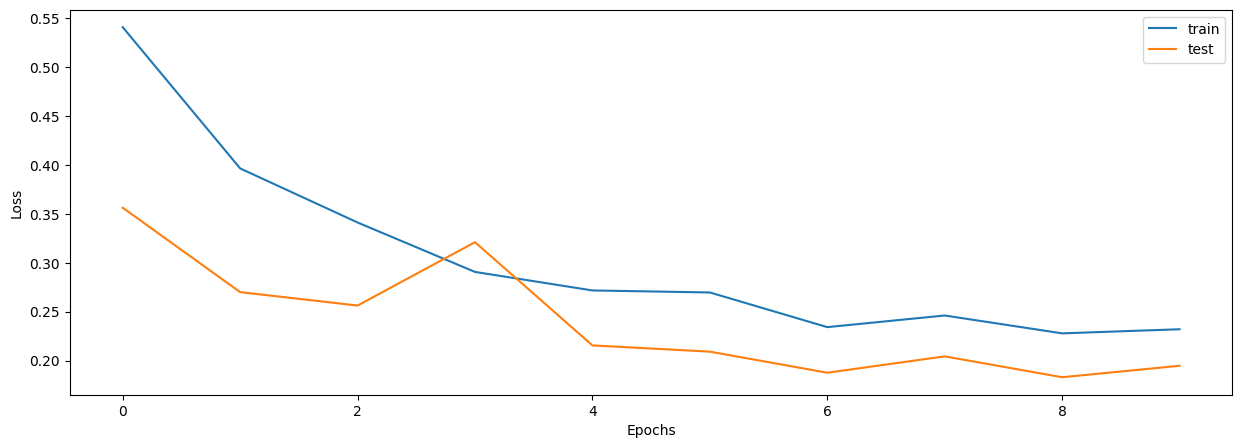

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

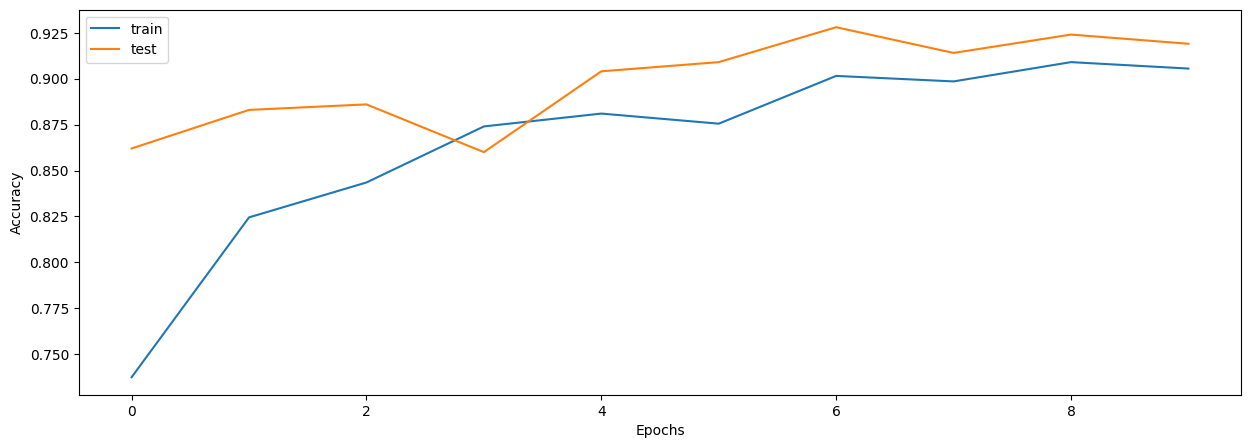

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

 - 학습/평가 데이터에 대해 측도 값을 출력해보세요.

In [ ]:
train_result = model.evaluate(train_ds)
test_result = model.evaluate(valid_ds)

print(f'학습 데이터 결과: {train_result}')
print(f'평가 데이터 결과: {test_result}')

32/32 [==============================] - 2s 71ms/step - loss: 0.1946 - accuracy: 0.9190
학습 데이터 결과: [0.2323828935623169, 0.902999997138977]
평가 데이터 결과: [0.19464360177516937, 0.9190000295639038]
